In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [58]:
data = pd.read_csv("Processed_final_data.csv")
class_names = np.array(["Healthy", "Broken"])

In [59]:
def split(data):
    
    X = data.drop(["Fault"], axis=1)
    y = data[["Fault"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [60]:
def plot_confusion_matrix(y_true, y_pred, classes,normalize=False, title=None, cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
            
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [61]:
 X_train, X_test, y_train, y_test = split(data)

## 1) Gaussian Naive Bayes Classifier

The Naive Bayes Classifier Score is: -   0.9905956112852664
Confusion matrix, without normalization
[[990   1]
 [ 17 906]]


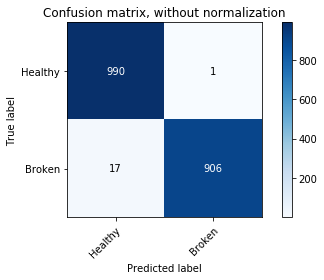

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("The Naive Bayes Classifier Score is: -   "  + str(gnb.score(X_test, y_test)))
y_predict = gnb.predict(X_test)

plot_confusion_matrix(y_test, y_predict, classes=class_names, title='Confusion matrix, without normalization')
plt.show()

Confusion matrix, without normalization
[[990   1]
 [ 17 906]]


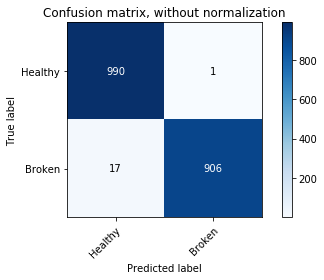

## 2) Logistic Regression Classifier 

The Logisitic Regression Classifier Score is: -   1.0
Confusion matrix, without normalization
[[991   0]
 [  0 923]]


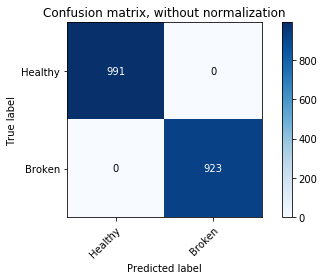

In [72]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print("The Logisitic Regression Classifier Score is: -   "  + str(clf.score(X_test, y_test)))


plot_confusion_matrix(y_test, y_predict, classes=class_names, title='Confusion matrix, without normalization')
plt.show()

## 3) Random Forest Classifier

The Random Forest Classifier Score is: -   0.9895506792058516
Confusion matrix, without normalization
[[982   9]
 [ 11 912]]


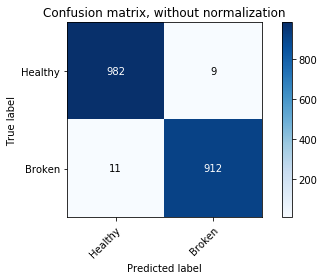

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train, y_train)  
y_predict = clf.predict(X_test)
print("The Random Forest Classifier Score is: -   "  + str(clf.score(X_test, y_test)))


plot_confusion_matrix(y_test, y_predict, classes=class_names, title='Confusion matrix, without normalization')
plt.show()

## 4) Support Vector Machine Classifier 


Support vector machine performed well only on Polynomial Kernel. "rbf" and "sigmoid" kernel has produced 50% score. 

The Support Vector Classifier Score is: -   1.0
Confusion matrix, without normalization
[[991   0]
 [  0 923]]


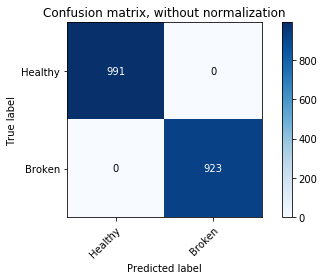

In [82]:
from sklearn.svm import SVC
clf = SVC(kernel='poly', gamma="auto")
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print("The Support Vector Classifier Score is: -   "  + str(clf.score(X_test, y_test)))

plot_confusion_matrix(y_test, y_predict, classes=class_names, title='Confusion matrix, without normalization')
plt.show()